In [9]:
%matplotlib inline
import time
import os
import csv
import matplotlib.pyplot as plt
from random import shuffle, sample
from matplotlib import cm
import pylab as pl
from IPython import display

In [10]:
MIN = 1
MAX = 2
AVG = 3
num_dims = 2
NUM_CLUSTERS = 3
cmode = AVG

data_file = csv.DictReader(open('dataset1.csv'))
HEADERS = ["f_0", "f_1"]
NUM_DIMENSIONS = min(num_dims, len(HEADERS))

# map number of cluster to points
clusters_to_points = {}
points_to_clusters = {}

X = []
for j, row in enumerate(data_file):
    _x = []
    for i in range(NUM_DIMENSIONS):
        _x.append(float(row[HEADERS[i]]))
    X.append(tuple(_x))
shuffle(X)

for j, _x in enumerate(X):
    clusters_to_points[j] = [_x]
    points_to_clusters[_x] = j

In [11]:
def dist(point1, point2, dim):
    dis = 0
    for i in range(dim):
        dis += (point1[i] - point2[i]) ** 2
    return dis ** 0.5

def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

def mode_dist(distances, mode):
    if mode == MIN:
        return min(distances)
    elif mode == MAX:
        return max(distances)
    else:
        return mean(distances)

0 ----------->
(1.01975747896, 1.66974715926),(0.955942473901, 1.61350760962),(0.902873233841, 1.83227215807),(0.726780515406, 1.66656942376),(0.710425038126, 1.42394051693),(0.729080865518, 1.43988487114),(0.690446608352, 1.45045312758),(0.674616380185, 1.44671756427),(0.790032477357, 1.43051336015),(0.622994244854, 1.39315948124),(0.614679062745, 1.29654374076),(0.588872485384, 1.26794323982),(0.554525364206, 1.28448384736),(0.562571286576, 1.28381228897),(0.733823125972, 1.27558849705),(0.706045642802, 1.32079372685),(0.762438976943, 1.18030763848),(0.878759364413, 1.20388602885),(0.896829129576, 1.32834066796),(0.856945730542, 1.38585535599),(1.06854840629, 1.44451808857),(1.01159303822, 1.31700738698),(0.47518237026, 1.06109519502),(0.524845339256, 0.996580038664),(0.509098898171, 0.942966273446),(0.58862925011, 1.11152219834),(0.352474568608, 1.45771015795),(0.432094027994, 1.52400393783),(0.507478502348, 1.44172596196),(0.355913431032, 1.31541022272),(0.157796305783, 1.497910147

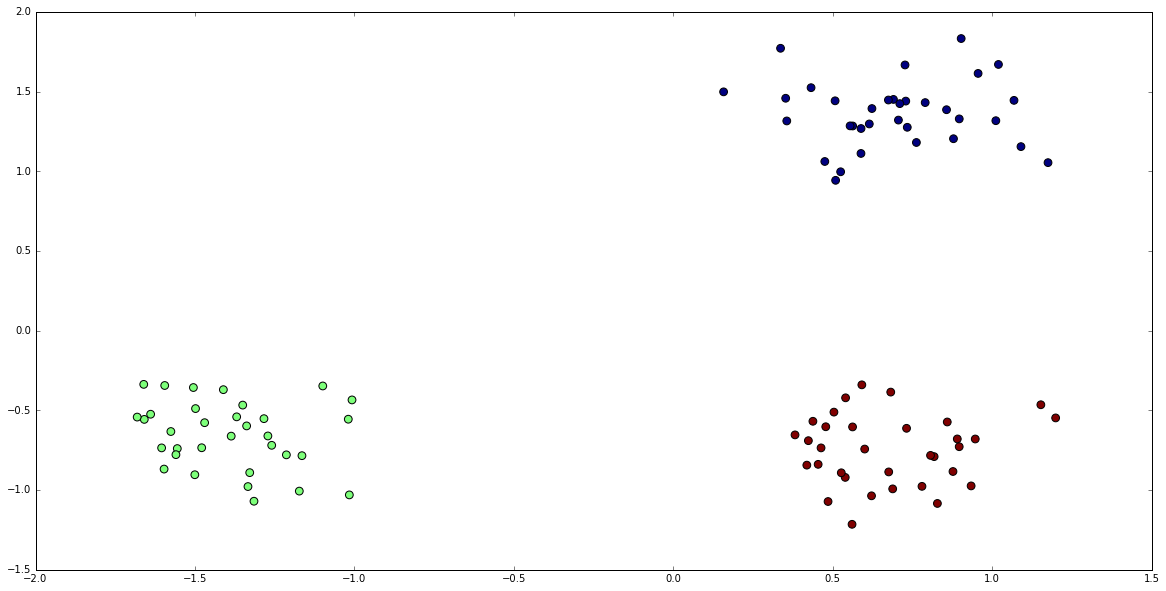

In [12]:
if NUM_DIMENSIONS == 2:
    plt.figure(figsize=(20,10))
    # plt.axis([-100, 100, -100, 100])
    plt.ion()

while True:
    if len(clusters_to_points) == NUM_CLUSTERS:
        break
    
    mn = 1 << 64
    ci = -1
    cj = -1
    for _ci, pointsi in clusters_to_points.iteritems():
        for _cj, pointsj in clusters_to_points.iteritems():
            if _ci != _cj:
                distances = []
                for pointi in pointsi:
                    for pointj in pointsj:
                        distances.append(dist(pointi, pointj, NUM_DIMENSIONS))
                dis = mode_dist(distances, cmode)
                if dis < mn:
                    mn = dis
                    ci = _ci
                    cj = _cj
    
    _ci = min(ci, cj)
    _cj = max(ci, cj)
    ci = _ci
    cj = _cj
    for point in clusters_to_points[cj]:
        points_to_clusters[point] = ci
    clusters_to_points[ci].extend(clusters_to_points[cj])
    del clusters_to_points[cj]

if NUM_DIMENSIONS == 2:
    xx = []
    yy = []
    zz = []
    for point, cluster_idx in points_to_clusters.iteritems():
        xx.append(point[0])
        yy.append(point[1])
        zz.append(cluster_idx)
    # Added specifically for ipython notebooks to see the live figure changes
    display.clear_output(wait=True)
    display.display(pl.gcf())
    plt.scatter(xx, yy, s=60, c=zz, marker='o', cmap=cm.jet);
    plt.pause(1)

for cluster_id, points in clusters_to_points.iteritems():
    print str(cluster_id) + " ----------->"
    print ",".join(map(str, points))